# Training Overview

This notebook provides an overview of the journey that the team took with training a variety of models. The journey is divded into 3 phases 

* Phase I - In this phase, team focused on the basic models and cropped datasets. (Typically this was explored in first two weeks of the competition, i.e., week 3 and 4)
* Phase II - In this phase, team focused on image augmentation. (Typically this was explored in weeks 5 and some of week 6)
* Phase III - In this phase, team focused on transder learning and visualizations. (Typically this was explored in final three weeks, i.e. week 6, 7 and 8)

# Phase I

## Baseline

In phase I, the focus was to explore the dataset and create basic models to come up with a model that will serve the purpose of a baseline. The team explored the original 96x96 size images from the kaggle competition and the 32x32 sized images' cropped dataset provided by the professor.

In this week, we started off with a simple model ([[GS] CancerDetection v01, version 2](https://www.kaggle.com/gauravsamudra/gs-cancerdetection-v01?scriptVersionId=78945236)) which had the following architecture - 

* 2 `Conv2D` layers with 16 and 32 filters with 0.5 dropout.
* 3 `Dense` layers with 16, 8 and 2 units with 0.5 dropout.
* Learning rate of 0.01 for 20 epochs.
* 80-20 training split.

This gave the below accuracy curve. We had about 75-80% accuracy. The validation curve had significant noise, so it was clear to run more epochs with a lower learning rate.

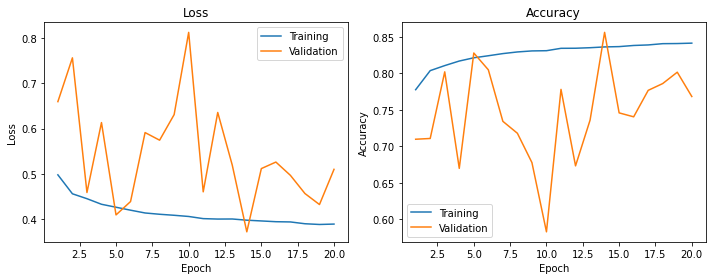

Team attempted another straight forward model below ([[LT] Cancer_Detection_final.ipynb](https://colab.research.google.com/drive/1_PvSVhBlYdwXEAqbb7a8RABTXgcU14ME?usp=sharing)). (Although this was executed in week 7/8, it is added here since it does not involve image augmentation or transfer learning)

* 3 `Conv2D` layers with 32, 64 and 128 filters with 0.3 dropouts.
* 2 `Dense` layers with 128 and 2 units with 0.5 dropout.
* Learning rate of 0.001 for 20 epochs followed by 0.0001 for 20 epochs followed by 0.00001 for 20 epochs.
* 80-20 training split.

## Exploring cropped images

The competition specified that when the training datase indicated a certain image had malignant cancer cells, that information would be in the center 32x32 pixels. So the team explored by adding `Cropping2D` layers that cropped the images or by using a pre-cropped dataset provided by the professor. 

The results were better, but not significantly, as compared to the baseline. It was noticed that the pre-cropped dataset was consuming noticably more time than the original dataset.

Towards the end of this phase we ended up with a model that had following architecture

* `Cropping2D` layer that cropped images to the 32x32 center 
* 2 `Conv2D` layers with 32 and 64 filters with 0.25 and 0.5 dropouts.
* 3 `Dense` layers with 32, 16 and 2 units with 0.5 and 0.25 dropouts.
* Learning rate of 0.001 for 25 epochs followed by 0.0001 for 25 epochs.
* 80-20 training split.

This gave the below accuracy curve. We had about 93% accuracy. On submitting this to the competition we scored 0.8958 public and 0.8368 private.

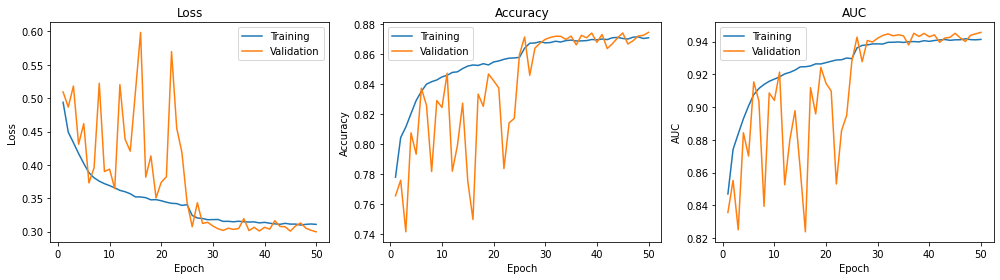

Some of the models are [[GS] CancerDetection v01, version 3](https://www.kaggle.com/gauravsamudra/gs-cancerdetection-v01?scriptVersionId=79131563), [[GS] CancerCropped v01, version 1](https://www.kaggle.com/gauravsamudra/gs-cancercropped-v01?scriptVersionId=79190201), [[GS] CancerCropped v01, version 2](https://www.kaggle.com/gauravsamudra/gs-cancercropped-v01?scriptVersionId=79325171), [[GS] CancerDetection v01, version 5](https://www.kaggle.com/gauravsamudra/gs-cancerdetection-v01?scriptVersionId=79421784)

# Phase II

In phase II, we explored various data augmentation techniques. Image augmentation is a technique that creates new training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc on the existing images dataset. 

There are two primary ways the team explored - 

1. Using the ImageDataGenerator class

    ```
    img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=30,
        horizontal_flip=True)
    ```

2. Using Keras’s image processing layers - In this one can create keras layers and add them to the model

    e.g. create a sequence of augmentation layers 
    
    ```
    data_augmentation = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.3)
    ])
    ```
    
    and add it to the model
    
    ```
    cnn = Sequential([
        Cropping2D(cropping=((32, 32), (32, 32)), input_shape=(96,96,3)),
        data_augmentation,
        Conv2D(32, (3,3), activation = 'relu', padding = 'same'),
        ...
    ```

## ImageDataGenerator

Using ImageDataGenerator we created below model - 

* Image augmentation using ImageDataGenerator and following properties
  * `rotation_range`
  * `width_shift_range`
  * `height_shift_range`
  * `horizontal_flip`
  * `zoom_range`
* 2 `Conv2D` layers with 32 and 64 filters with 0.25 and 0.5 dropouts.
* 3 `Dense` layers with 32, 16 and 2 units with 0.5 and 0.25 dropouts.
* Learning rate of 0.001 for 25 epochs followed by 0.0001 for 25 epochs.
* 50-50 training split.

This was execcuted on both 32x32 cropped dataset ([[JW] CancerDetection v01 with visualizations, version 6](https://www.kaggle.com/jennaward6/jw-cancerdetection-v01-with-visualizations?scriptVersionId=79944622)) and 96x96 original dataset ([[JW] CancerDetection v01 with visualizations, version 12](https://www.kaggle.com/jennaward6/jw-cancerdetection-v01-with-visualizations?scriptVersionId=80269876)). Multiple models were executed by tweaking the augmentation parameters to understand the effect of the same.

On the original dataset, this gave the below accuracy curve. We had about 95% accuracy. On submitting this to the competition we scored 0.91 public and 0.85 private.

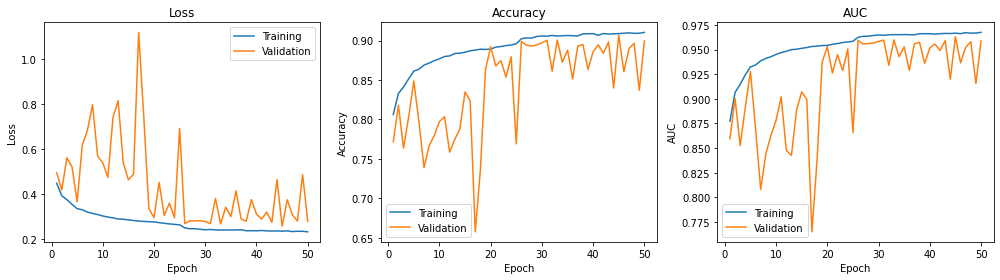

## Keras’s image processing layers

Using ImageDataGenerator we created below model - 

* Image augmentation using following Keras Layers
  * `RandomFlip`
  * `RandomRotation`
  * `RandomZoom`
  * `RandomContrast`
  * `RandomTranslation`
* 2 `Conv2D` layers with 32 and 64 filters with 0.25 and 0.5 dropouts.
* 3 `Dense` layers with 32, 16 and 2 units with 0.5 and 0.25 dropouts.
* Learning rate of 0.001 for 25 epochs followed by 0.0001 for 25 epochs.
* 80-20 training split.

This was executed by cropping dataset to 32x32 size (([[GS] CancerDetection v01, version 6](https://www.kaggle.com/gauravsamudra/gs-cancerdetection-v01?scriptVersionId=79722910)). Multiple models were also executed on 96x96 original dataset ([[GS] CancerDetection v01, version 8](https://www.kaggle.com/gauravsamudra/gs-cancerdetection-v01?scriptVersionId=80343000), [[GS] CancerDetection v01, version 9](https://www.kaggle.com/gauravsamudra/gs-cancerdetection-v01?scriptVersionId=80382080)) by tweaking the augmentation parameters to understand the effect of the same.

This gave the below accuracy curve. We had about 92% accuracy. On submitting this to the competition we scored 0.9056 public and 0.8369 private.

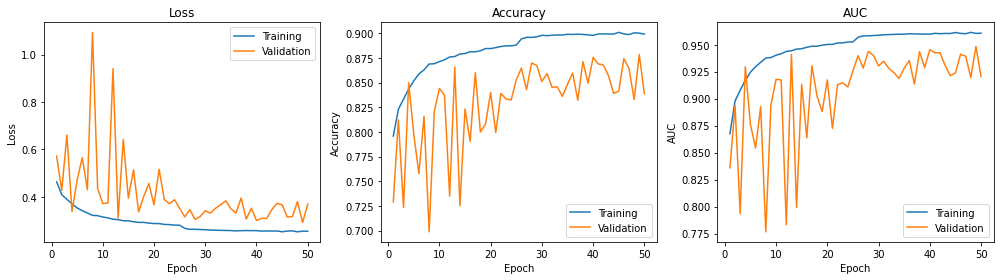


# Phase III

Towards the end of Phase II and into phase III the team started looking at transfer learning and visualization techniques. 

## Transfer Learning

Transfer learning is a technique in which a convolutional neural network for an image classification task is constructed by re-using a portion of a previously trained convolutional neural network.

The team attempted various pre-trained models, such as

* [VGG16](https://keras.io/api/applications/vgg/#vgg16-function)
* [ResNet50](https://keras.io/api/applications/resnet/#resnet50-function)
* [ResNet50V2](https://keras.io/api/applications/resnet/#resnet50v2-function)
* [InceptionResNetV2](https://keras.io/api/applications/inceptionresnetv2/)
* Ensemble Model with Random Forest
* Ensemble Model with Logistic Regression

The architecture was typically like below 

* Image augmentation using following Keras Layers
* Transfer Learning layer such as `VGG16`, `ResNet50`, etc.
* Learning rate of 0.001 for 25 epochs followed by 0.0001 for 25 epochs.
* 80-20 training split.

With VGG16 ([[LP] Cancer Detection VGG16 Model](https://www.kaggle.com/lokanathpatro/lp-cancer-detection-vgg16-model), 
[[GS] CancerDetection v02](https://www.kaggle.com/gauravsamudra/gs-cancerdetection-v02?scriptVersionId=80580580))
we got the below accuracy curve. On submitting this to the competition we scored 0.9449 public and 0.9376 private.

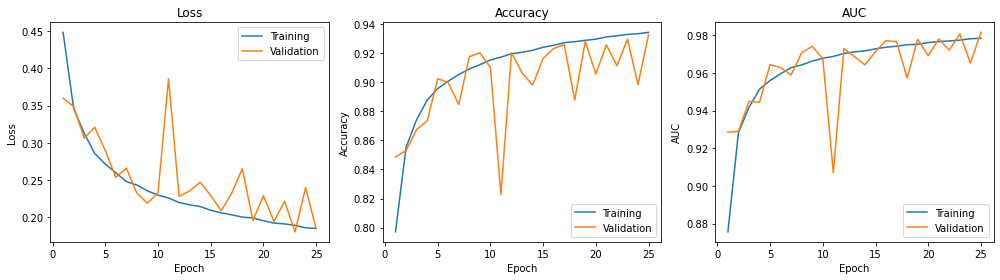

With ResNet50 ([[LP] Cancer Detection ResNet50 Model](https://www.kaggle.com/lokanathpatro/lp-cancer-detection-resnet50-model)), we got the below accuracy curve. On submitting this to the competition we scored 0.8798 public and 0.9029 private.

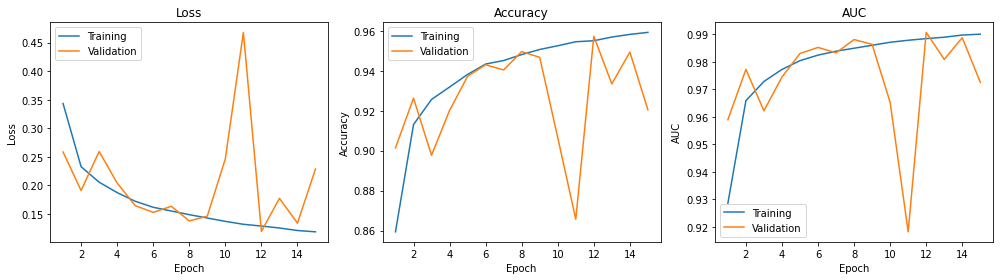

With ResNet50V2 ([[GS] CancerDetection v02, version 2 - ResNet50V2](https://www.kaggle.com/gauravsamudra/gs-cancerdetection-v02?scriptVersionId=80876539)), we got the below accuracy curve. On submitting this to the competition we scored 0.9150 public and 0.8928 private.

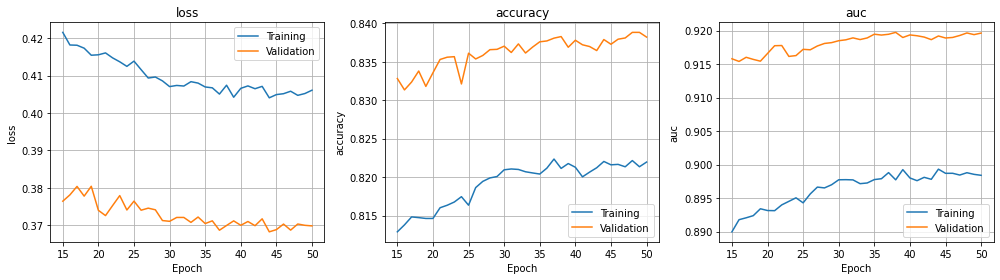


## Ensemble

Team explored creating an ensemble of multiple models.

### Ensemble Model with Random Forest

The first ensemble was of `Dense256` (custom keras model of Conv2D layers with 32, 64, and 128 filters and Dense layers with 256 and 2 units), `ResNet50` and `VGG16` model with a `GridSearchCV` using`RandomForestClassifier`
([[LP] Cancer Detection Ensemble Model](https://www.kaggle.com/lokanathpatro/lp-cancer-detection-ensemble-model). 

Below is a plot the accuracies of above models. On submitting this to the competition we scored 0.8577 public and 0.8408 private.

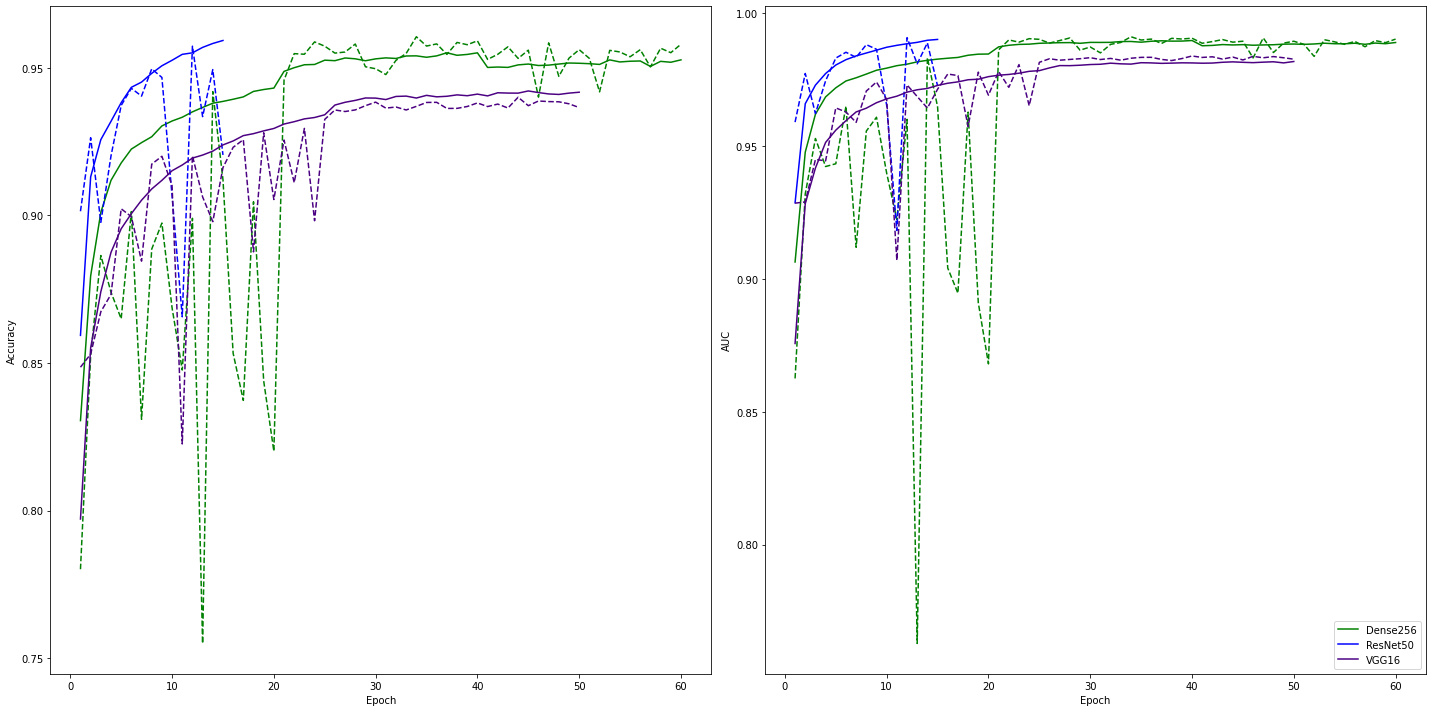

### Ensemble Model with Logistic Regression

The first ensemble was of `Dense256` (custom keras model of Conv2D layers with 32, 64, and 128 filters and Dense layers with 256 and 2 units), `Dense512` (custom keras model of Conv2D layers with 32, 64, 128 and 256 filters and Dense layers with 512 and 2 units), `VGG16` and `ResNet50` model with a `GridSearchCV` using`LogisticRegression`
([[LP] Cancer Detection Ensemble Model with LR](https://www.kaggle.com/lokanathpatro/lp-cancer-detection-ensemble-model-with-lr). 

On submitting this to the competition we scored 0.8569 public and 0.8370 private.

## PyTorch

Until now all models were created with Keras. So, team explored a PyTorch based model ([[LP] Cancer Detection CNN Model with PyTorch](https://www.kaggle.com/lokanathpatro/lp-cancer-detection-cnn-model-with-pytorch)). The model had below architecture

* Image augmentation using following Keras Layers
  * `RandomHorizontalFlip`
  * `RandomVerticalFlip`
  * `RandomRotation`
* 5 `Conv2D` layers with 32, 64, 128, 256 and 512 filters and a dropout.
* 3 `Liner` layers with 4608, 32, 16 and 2 units with 0.5 and 0.25 dropouts.
* Learning rate of 0.001 for 25 epochs followed by 0.0001 for 25 epochs.
* 80-20 training split.

This was executed on 96x96 original dataset. This gave the below accuracy curve. We had about 98% accuracy. On submitting this to the competition we scored 0.9642 public and 0.9263 private.

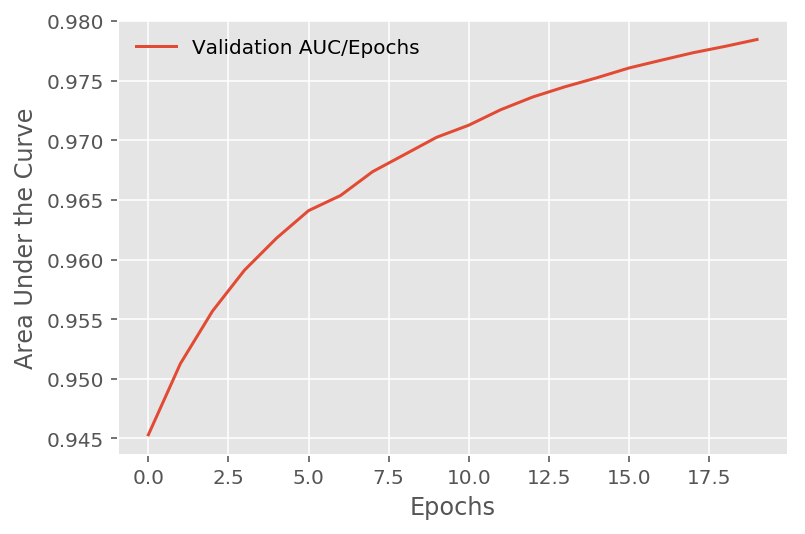
